# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

## Business Understanding

A client is looking to relocate to Florida where there are no state taxes.  He prefers south Florida, specifically the Miami-Fort Lauderdale metro area and his budget to purchase a home is in the range of 700k-1M.  

## Data Preparation

In [1]:
#Importing necessary Packages
import warnings
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
from collections import Counter
import folium
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
%matplotlib inline
import seaborn as sb
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

ImportError: cannot import name 'int' from 'numpy' (C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\numpy\__init__.py)

In [ ]:
#Loading our dataset
df = pd.read_csv('zillow_data.csv')

In [ ]:
df

#### Data Cleaning

Lets change RegionName to zipcode

In [ ]:
df= df.rename(columns={'RegionName': 'Zipcode'})

In [ ]:
#check if data is missing
df.isna().sum()

In [3]:
df.isna().sum().sum()

NameError: name 'df' is not defined

In [4]:
#expanding visible columns
pd.set_option('display.max_columns', None)
df

NameError: name 'df' is not defined

In [5]:
df['2014-06'].isna().sum()

NameError: name 'df' is not defined

In [284]:
#interpolate median house values for each month in which there is an absent value
df.interpolate(inplace=True)
df

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,787

In [285]:
df['Metro'].fillna('missing', inplace=True)

In [286]:
#checking for missing values
df.isna().sum().sum()

0

In [287]:
#checking for duplicates
df.duplicated().sum()

0

In [288]:
#checking data types
df.dtypes

RegionID     int64
Zipcode      int64
City        object
State       object
Metro       object
             ...  
2017-12      int64
2018-01      int64
2018-02      int64
2018-03      int64
2018-04      int64
Length: 272, dtype: object

Zipcodes are integers but should be strings as they will be used as categorical data.  Lets convert.

In [289]:
#data type from integer to string
df['Zipcode']= df['Zipcode'].astype('string')

In [290]:
#checking for issues
print(df.Zipcode.min())
print(df.Zipcode.max())

1001
99901


There are some zip codes with 4 digits and after checking a few items it seems like there is a missing 0 at the beginning so for all 4 digit zip codes lets add a 0 in front. 

In [291]:
for i in range(len(df)):
    df.Zipcode[i]= df.Zipcode[i].rjust(5, '0')

In [292]:
print(df.Zipcode.min())

01001


#### Column Creation

##### ROI

I'm going to look at long term and short term real estate investing returns with a 10 year and 3 year ROI for each zip code. 

ROI3 = (median home price as of 04-18 / median home price 04-15) -1

ROI10 = (median home price as of 4-18 / median home price 04-08) -1

In [293]:
#creating ROI columns
df['ROI3'] = (df['2018-04']/ df['2015-04'])-1
df['ROI10'] = (df['2018-04']/ df['2008-04'])-1

##### Coefficient of Variation (CV)

Coefficient of Variation is used to show volatility.  It is calculated by mean / standard deviation.  It provides insight into how much risk was taken in each unit of return.  The lower the better.

In [294]:
#calculating std to be used to find CV for 3 and 10 year horizon
df["std3"] = df.loc[:, "2015-04":"2018-04"].std(skipna=True, axis=1)
df["std10"] = df.loc[:, "2008-04":"2018-04"].std(skipna=True, axis=1)

#calculating mean to be used to find CV for 3 and 10 year horizon
df["mean3"] = df.loc[:, "2015-04":"2018-04"].mean(skipna=True, axis=1)
df["mean10"] = df.loc[:, "2008-04":"2018-04"].mean(skipna=True, axis=1)

# calculating and creating new columns - CV for 3 and 10 year
df["CV3"] = df['std3']/df["mean3"]
df["CV10"] = df['std10']/df["mean10"]

# dropping std and mean as they are not necessary for analysis

df.drop(["std3", "mean3"], inplace=True, axis=1)

df.drop(["std10", "mean10"], inplace=True, axis=1)

#### Convert Data to Time Series

In [296]:
dfts= df.copy()

In [297]:
#wideview to long view
def melt_df(data):
    melted = pd.melt(data, id_vars=['RegionID','Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 
                                  'ROI3', 'CV3', 'ROI10', 'CV10' ], var_name='Date')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [298]:
dfts= melt_df(dfts)

In [299]:
# Converting the date data type into date time and indexing

dfts['Date'] = pd.to_datetime(dfts['Date'], format='%m/%y')

# Set the 'Date' column as index

dfts.set_index('Date', inplace=True)


In [1]:
# renaming the column value to median_price

dfts.rename(columns = {"value" : "Median"}, inplace=True)

NameError: name 'dfts' is not defined

In [301]:
dfts.tail()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI3,CV3,ROI10,CV10,Mean Price
Date,,,,,,,,,,,,
2018-04-01,58333,01338,Ashfield,MA,Greenfield Town,Franklin,14719,0.090104,0.058664,0.058140,0.061037,209300.0
2018-04-01,59107,03293,Woodstock,NH,Claremont,Grafton,14720,0.224512,0.064043,-0.005724,0.070133,225800.0
2018-04-01,75672,40404,Berea,KY,Richmond,Madison,14721,0.270476,0.073476,0.292636,0.069886,133400.0
2018-04-01,93733,81225,Mount Crested Butte,CO,missing,Gunnison,14722,0.202099,0.098914,0.040238,0.098244,664400.0
2018-04-01,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,0.227491,0.061221,0.048430,0.179319,357200.0


As we are only looking at pricing data over the last 10 years, we can drop all dates prior to 04/2008.

In [302]:
#drop rows before our analysis range
dfts.drop(pd.date_range('1996-04-01', '2008-03-01'), errors='ignore', inplace=True)

In [303]:
#check drops were made
dfts.tail()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI3,CV3,ROI10,CV10,Mean Price
Date,,,,,,,,,,,,
2018-04-01,58333,01338,Ashfield,MA,Greenfield Town,Franklin,14719,0.090104,0.058664,0.058140,0.061037,209300.0
2018-04-01,59107,03293,Woodstock,NH,Claremont,Grafton,14720,0.224512,0.064043,-0.005724,0.070133,225800.0
2018-04-01,75672,40404,Berea,KY,Richmond,Madison,14721,0.270476,0.073476,0.292636,0.069886,133400.0
2018-04-01,93733,81225,Mount Crested Butte,CO,missing,Gunnison,14722,0.202099,0.098914,0.040238,0.098244,664400.0
2018-04-01,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,0.227491,0.061221,0.048430,0.179319,357200.0


## EDA

Looking to see which countys have the most top 50 entries entries for ROI and CV.

In [319]:
#best places to invest by county in last 3 years
dfr3= df.sort_values(by='ROI3', ascending= False).head(50)
dfr3['CountyName'].value_counts()

Hudson          3
Brevard         3
Volusia         3
Polk            3
Duval           3
Dekalb          2
Pasco           2
Miami-Dade      2
Davidson        2
Saint Lucie     2
Pinellas        2
Dallas          2
Charleston      2
Durham          1
Philadelphia    1
Kent            1
Allegheny       1
Hillsborough    1
Manatee         1
Perquimans      1
Franklin        1
Greenville      1
Wyandotte       1
Mecklenburg     1
Broward         1
Saint Johns     1
Palm Beach      1
Wake            1
Hamilton        1
Clark           1
Marion          1
Charlotte       1
Name: CountyName, dtype: int64

4/5 of the countys with the most entries in the top ROI in the past three years are in Florida.  No county has more than three entries.

In [332]:
#average 3 year ROI vs Florida 3 year ROI
FLdf= df[df['State']== 'FL']
print(FLdf['ROI3'].mean())
print(df['ROI3'].mean())

0.3622110325456214
0.2084633953135752


In [320]:
#best places to invest by county over last 10 years
dfr10= df.sort_values(by='ROI10', ascending= False).head(50)
dfr10['CountyName'].value_counts()

Santa Clara     10
Kings            3
Kauai            3
Los Angeles      2
Camden           2
Middlesex        2
Allegheny        2
Contra Costa     2
Clinton          1
Grafton          1
Madera           1
Carbon           1
Leelanau         1
Arapahoe         1
Denver           1
Kent             1
Suffolk          1
Bottineau        1
Saint Louis      1
Citrus           1
Campbell         1
Davidson         1
Williams         1
Mariposa         1
San Juan         1
Madison          1
Glynn            1
Queens           1
Napa             1
Pinellas         1
San Mateo        1
Alameda          1
Name: CountyName, dtype: int64

Santa Clara is all alone at the top with 10 entries in the top 50 highest 10 year ROI zipcodes.

In [331]:
#average 10 year ROI vs SantaClara 10 year ROI
SCdf= df[df['CountyName']== 'Santa Clara']
print(SCdf['ROI10'].mean())
print(df['ROI10'].mean())

0.8808352097194927
0.13252944384653423


Over the last 10 years Santa Clara County homes have an average return of 88% compared to 13% national average.

In [321]:
#lowest price volatility last 3 years
dfc3= df.sort_values(by='CV3', ascending= True).head(50)
dfc3['CountyName'].value_counts()

Jasper              6
Cook                3
Anchorage           3
McLean              3
Harris              2
Somerset            2
Howard              2
Montgomery          2
Fairfield           2
Tom Green           1
Bremer              1
Putnam              1
Bell                1
Bowie               1
Champaign           1
Orange              1
Huntingdon          1
Carroll             1
Raleigh             1
East Baton Rouge    1
Knox                1
Middlesex           1
Fort Bend           1
McKean              1
Sumter              1
Rock Island         1
Madison             1
Nelson              1
Natrona             1
Walsh               1
McKinley            1
Burleigh            1
Washington          1
Clay                1
Name: CountyName, dtype: int64

In [323]:
#lowest price volatility over last 10 years
dfc10= df.sort_values(by='CV10', ascending= True).head(50)
dfc10['CountyName'].value_counts()

El Paso                 5
Jasper                  4
Fairbanks North Star    4
Peoria                  3
Matanuska Susitna       3
Grant                   2
Erie                    2
Pulaski                 2
Clinton                 2
Christian               2
McLean                  2
Bowie                   1
Otsego                  1
Franklin                1
Harnett                 1
Pottawattamie           1
Anderson                1
Bell                    1
Hoke                    1
Stephens                1
Tazewell                1
Sumter                  1
Warren                  1
Refugio                 1
Moore                   1
Somerset                1
Lee                     1
Rock Island             1
Crawford                1
Cabell                  1
Name: CountyName, dtype: int64

In [324]:
#lowest ROI last 3 years
df3r= df.sort_values(by='ROI3', ascending= True).head(50)
df3r['CountyName'].value_counts()

Darke           6
Brown           3
Dougherty       3
New York        2
Rockingham      2
Saint James     2
Manitowoc       2
Osborne         2
Kankakee        2
Marion          2
Greene          1
Hinds           1
Whiteside       1
Somerset        1
Mercer          1
Newton          1
Edwards         1
Harrison        1
Nash            1
Perquimans      1
Stafford        1
Jasper          1
Cook            1
Lafayette       1
Smith           1
Atlantic        1
McDonough       1
Tishomingo      1
Jersey          1
Luzerne         1
Pittsylvania    1
Caddo           1
La Salle        1
Cambria         1
Name: CountyName, dtype: int64

In [325]:
#lowest ROI last 10 years
df10r= df.sort_values(by='ROI10', ascending= True).head(50)
df10r['CountyName'].value_counts()

Pike          2
Montgomery    2
Schuylkill    2
Lee           2
Washington    2
McDonough     2
Haskell       2
Jefferson     2
Brown         1
Lamb          1
Phelps        1
Madison       1
Cambria       1
Pushmataha    1
Baylor        1
Quitman       1
Fayette       1
Edwards       1
Scott         1
Saint Mary    1
Neosho        1
Johnson       1
Pawnee        1
Sullivan      1
Osborne       1
Van Buren     1
Muskegon      1
Pondera       1
Decatur       1
Keokuk        1
Jewell        1
Labette       1
Barton        1
Franklin      1
Wexford       1
Licking       1
Morgan        1
Stafford      1
Guadalupe     1
Walthall      1
Calhoun       1
Otter Tail    1
Name: CountyName, dtype: int64

In [304]:
#Looking at most expensive zip code
dfts.sort_values('Mean Price', ascending=False)

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI3,CV3,ROI10,CV10,Mean Price
Date,,,,,,,,,,,,
2016-10-01,61635,10021,New York,NY,New York,New York,273,0.075156,0.034355,0.723049,0.219415,19314900.0
2016-11-01,61635,10021,New York,NY,New York,New York,273,0.075156,0.034355,0.723049,0.219415,19282600.0
2017-05-01,61635,10021,New York,NY,New York,New York,273,0.075156,0.034355,0.723049,0.219415,19215000.0
2017-06-01,61635,10021,New York,NY,New York,New York,273,0.075156,0.034355,0.723049,0.219415,19128600.0
2016-12-01,61635,10021,New York,NY,New York,New York,273,0.075156,0.034355,0.723049,0.219415,19103000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-01,89482,72331,Earle,AR,Memphis,Crittenden,12585,0.037594,0.029182,-0.405172,0.163929,13500.0
2015-06-01,89482,72331,Earle,AR,Memphis,Crittenden,12585,0.037594,0.029182,-0.405172,0.163929,13500.0
2015-03-01,89482,72331,Earle,AR,Memphis,Crittenden,12585,0.037594,0.029182,-0.405172,0.163929,13400.0


New York City has the most expensive zipcode while Earle, Arkansas has the least.

In [305]:
dfts.sort_values('ROI3', ascending=False)

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI3,CV3,ROI10,CV10,Mean Price
Date,,,,,,,,,,,,
2015-08-01,69649,27980,Hertford,NC,Elizabeth City,Perquimans,13410,1.455631,0.293284,-0.210642,0.347789,57300.000000
2009-03-01,69649,27980,Hertford,NC,Elizabeth City,Perquimans,13410,1.455631,0.293284,-0.210642,0.347789,162733.333333
2011-06-01,69649,27980,Hertford,NC,Elizabeth City,Perquimans,13410,1.455631,0.293284,-0.210642,0.347789,143633.333333
2014-12-01,69649,27980,Hertford,NC,Elizabeth City,Perquimans,13410,1.455631,0.293284,-0.210642,0.347789,56100.000000
2017-02-01,69649,27980,Hertford,NC,Elizabeth City,Perquimans,13410,1.455631,0.293284,-0.210642,0.347789,92500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2009-10-01,81629,54230,Reedsville,WI,Manitowoc,Manitowoc,11392,-0.370168,0.158013,-0.498025,0.184394,231850.000000
2015-09-01,81629,54230,Reedsville,WI,Manitowoc,Manitowoc,11392,-0.370168,0.158013,-0.498025,0.184394,184600.000000
2011-03-01,81629,54230,Reedsville,WI,Manitowoc,Manitowoc,11392,-0.370168,0.158013,-0.498025,0.184394,226100.000000


Hertford NC has the best 3 year ROI while Reddsville Wisc has the worst.

In [41]:
ROI3_zipcodes = pd.DataFrame(df.groupby("Zipcode")["ROI3"].mean().sort_values(ascending=False).head(5))
CV3_zipcodes = pd.DataFrame(df.groupby("Zipcode")["CV3"].mean().sort_values(ascending=True).head(5))

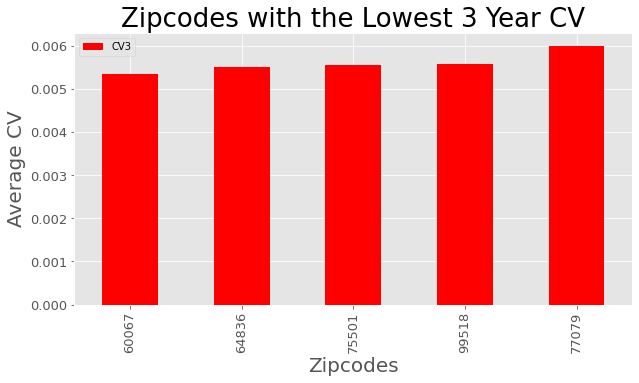

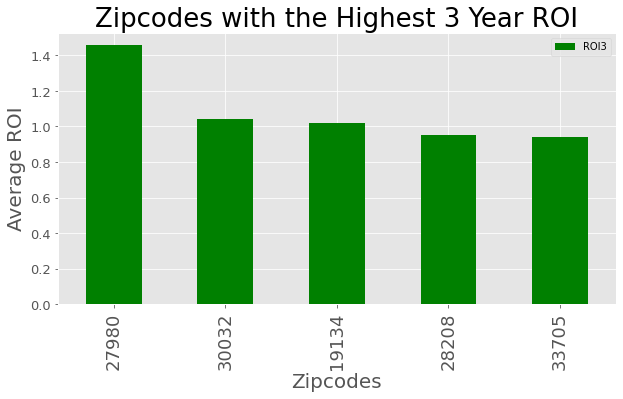

In [42]:
ax1 = CV3_zipcodes.plot(kind='bar', figsize=(10,5), color="red", fontsize=13);
ax1.set_alpha(0.8)

ax2 =ROI3_zipcodes.plot(kind='bar', figsize=(10,5), color="green", fontsize=13);
ax2.set_alpha(0.8)

ax1.set_title("Zipcodes with the Lowest 3 Year CV", fontsize=26)
ax1.set_ylabel("Average CV", fontsize=20);
ax1.set_xlabel("Zipcodes", fontsize=20)


ax2.set_title("Zipcodes with the Highest 3 Year ROI", fontsize=26)
ax2.set_ylabel("Average ROI", fontsize=20);
ax2.set_xlabel("Zipcodes", fontsize=20)
plt.xticks(fontsize= 18)
plt.savefig("output.jpg")
plt.show()

In [43]:
bad_ROI3_zipcodes = pd.DataFrame(df.groupby("Zipcode")["ROI3"].mean().sort_values(ascending=True).head(5))
bad_CV3_zipcodes = pd.DataFrame(df.groupby("Zipcode")["CV3"].mean().sort_values(ascending=False).head(5))

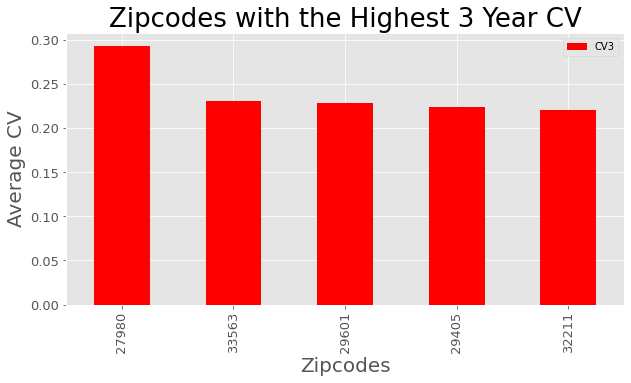

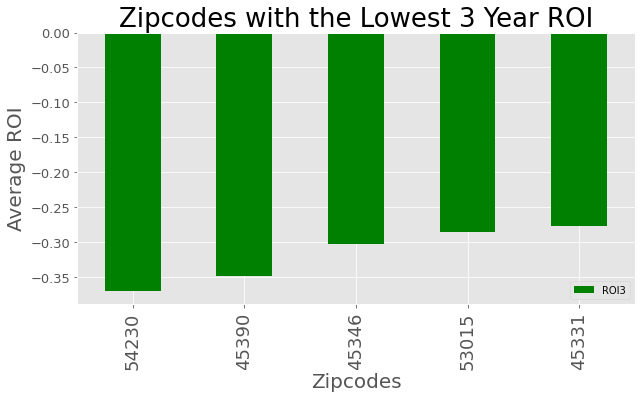

In [44]:
ax1 = bad_CV3_zipcodes.plot(kind='bar', figsize=(10,5), color="red", fontsize=13);
ax1.set_alpha(0.8)

ax2 = bad_ROI3_zipcodes.plot(kind='bar', figsize=(10,5), color="green", fontsize=13);
ax2.set_alpha(0.8)

ax1.set_title("Zipcodes with the Highest 3 Year CV", fontsize=26)
ax1.set_ylabel("Average CV", fontsize=20);
ax1.set_xlabel("Zipcodes", fontsize=20)


ax2.set_title("Zipcodes with the Lowest 3 Year ROI", fontsize=26)
ax2.set_ylabel("Average ROI", fontsize=20);
ax2.set_xlabel("Zipcodes", fontsize=20)
plt.xticks(fontsize= 18)
plt.savefig("output.jpg")
plt.show()

In [45]:
ROI10_zipcodes = pd.DataFrame(df.groupby("Zipcode")["ROI10"].mean().sort_values(ascending=False).head(5))
CV10_zipcodes = pd.DataFrame(df.groupby("Zipcode")["CV10"].mean().sort_values(ascending=True).head(5))

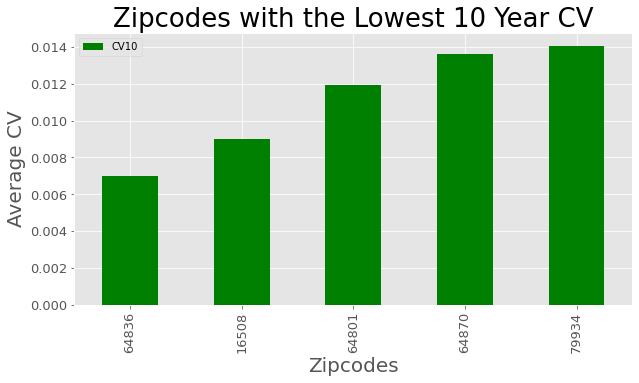

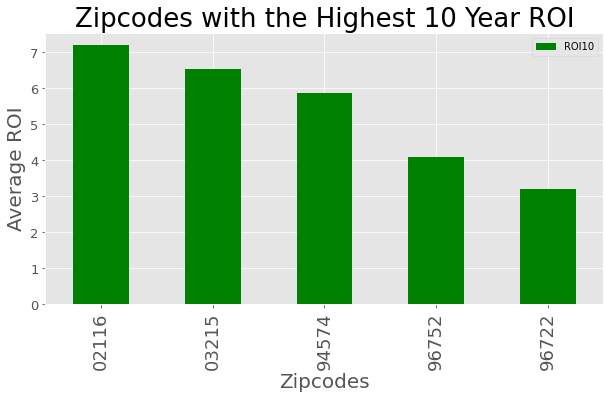

In [70]:
ax1 = CV10_zipcodes.plot(kind='bar', figsize=(10,5), color="green", fontsize=13);
ax1.set_alpha(0.8)

ax2 =ROI10_zipcodes.plot(kind='bar', figsize=(10,5), color="green", fontsize=13);
ax2.set_alpha(0.8)

ax1.set_title("Zipcodes with the Lowest 10 Year CV", fontsize=26)
ax1.set_ylabel("Average CV", fontsize=20);
ax1.set_xlabel("Zipcodes", fontsize=20)


ax2.set_title("Zipcodes with the Highest 10 Year ROI", fontsize=26)
ax2.set_ylabel("Average ROI", fontsize=20);
ax2.set_xlabel("Zipcodes", fontsize=20)
plt.xticks(fontsize= 18)
plt.savefig("output.jpg")
plt.show()

In [47]:
bad_ROI10_zipcodes = pd.DataFrame(df.groupby("Zipcode")["ROI10"].mean().sort_values(ascending=True).head(5))
bad_CV10_zipcodes = pd.DataFrame(df.groupby("Zipcode")["CV10"].mean().sort_values(ascending=False).head(5))

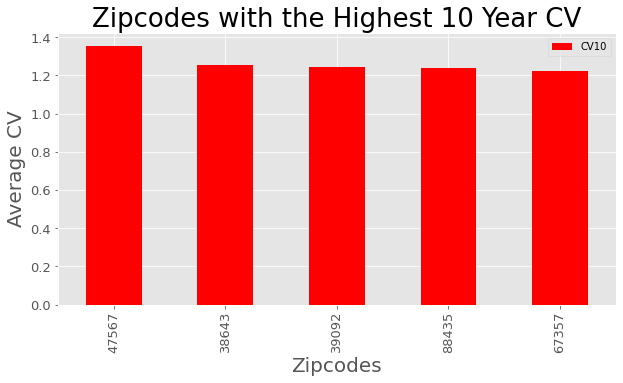

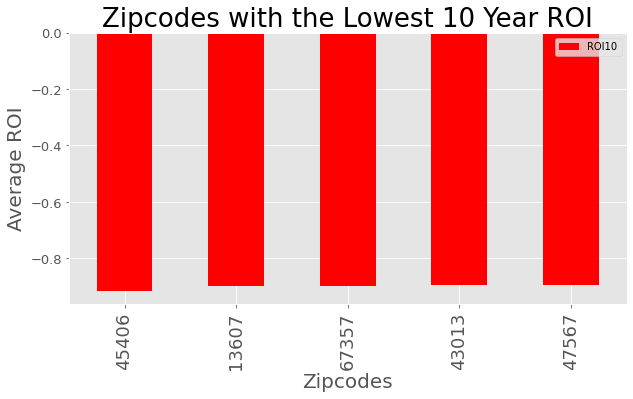

In [69]:
ax1 = bad_CV10_zipcodes.plot(kind='bar', figsize=(10,5), color="red", fontsize=13);
ax1.set_alpha(0.8)

ax2 = bad_ROI10_zipcodes.plot(kind='bar', figsize=(10,5), color="red", fontsize=13);
ax2.set_alpha(0.8)

ax1.set_title("Zipcodes with the Highest 10 Year CV", fontsize=26)
ax1.set_ylabel("Average CV", fontsize=20);
ax1.set_xlabel("Zipcodes", fontsize=20)


ax2.set_title("Zipcodes with the Lowest 10 Year ROI", fontsize=26)
ax2.set_ylabel("Average ROI", fontsize=20);
ax2.set_xlabel("Zipcodes", fontsize=20)
plt.xticks(fontsize= 18)
plt.savefig("output.jpg")
plt.show()

In [71]:
#mean price by month
d1= dfts.groupby(dfts.index.date)['Mean Price'].mean()

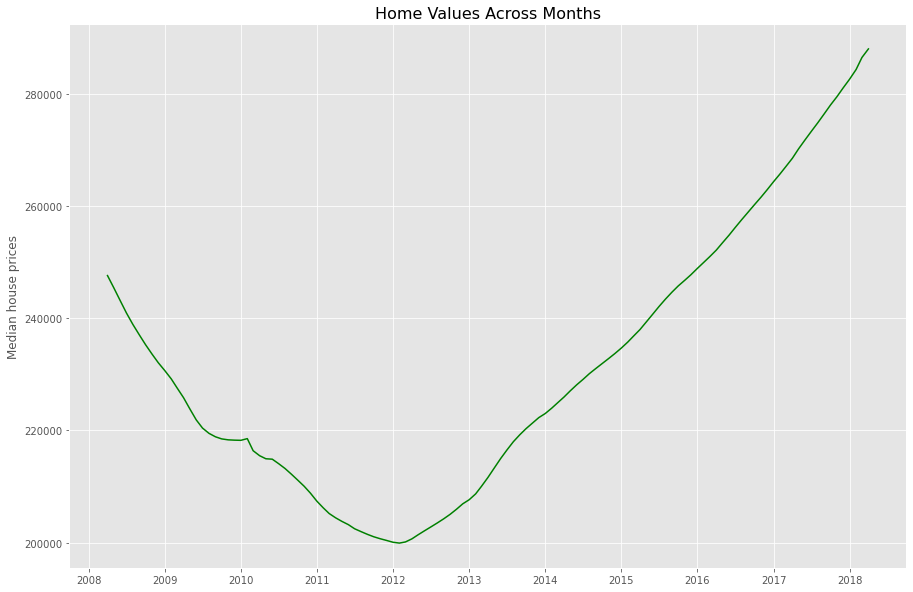

In [72]:
#plot mean price home by month
d1.plot(figsize=(15,10), color="green")
plt.title('Home Values Across Months', fontsize=(16))
plt.ylabel('Mean House Prices')
plt.show()

We see the average price of a home dip from 2008 to 2012 where it bottoms and then proceeds to show a strong upward trend.  

In [77]:
# checking for trend, seasonality and residuals in data
from statsmodels.tsa.seasonal import seasonal_decompose

In [159]:
#creating df for lowest 10 year CV
cvzip= dfts[dfts['Zipcode']== '64836']
cvzip

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI3,CV3,ROI10,CV10,Mean Price
Date,,,,,,,,,,,,
2008-04-01,86615,64836,Carthage,MO,Joplin,Jasper,4741,0.00997,0.005497,0.0,0.006983,101300.0
2008-05-01,86615,64836,Carthage,MO,Joplin,Jasper,4741,0.00997,0.005497,0.0,0.006983,101400.0
2008-06-01,86615,64836,Carthage,MO,Joplin,Jasper,4741,0.00997,0.005497,0.0,0.006983,101400.0
2008-07-01,86615,64836,Carthage,MO,Joplin,Jasper,4741,0.00997,0.005497,0.0,0.006983,101300.0
2008-08-01,86615,64836,Carthage,MO,Joplin,Jasper,4741,0.00997,0.005497,0.0,0.006983,101200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,86615,64836,Carthage,MO,Joplin,Jasper,4741,0.00997,0.005497,0.0,0.006983,99000.0
2018-01-01,86615,64836,Carthage,MO,Joplin,Jasper,4741,0.00997,0.005497,0.0,0.006983,98900.0
2018-02-01,86615,64836,Carthage,MO,Joplin,Jasper,4741,0.00997,0.005497,0.0,0.006983,99500.0


In [160]:
cvz= cvzip['Mean Price']
cvz

Date
2008-04-01    101300.0
2008-05-01    101400.0
2008-06-01    101400.0
2008-07-01    101300.0
2008-08-01    101200.0
                ...   
2017-12-01     99000.0
2018-01-01     98900.0
2018-02-01     99500.0
2018-03-01    100600.0
2018-04-01    101300.0
Name: Mean Price, Length: 121, dtype: float64

In [74]:
#creating a definition for trend, seasonality, and residual decomposition
def seasonal_decomposition(df):
    decomposition = seasonal_decompose(df)
    
    # Gather the trend, seasonality, and residuals 
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

# Plot gathered statistics
    plt.figure(figsize=(8,8))
    plt.subplot(411)
    plt.plot(df, label='Original', color='blue')
    #plt.plot(ts, label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()

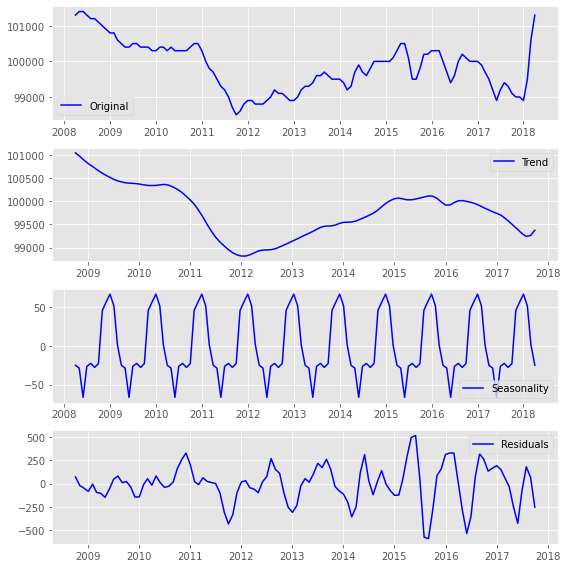

In [161]:
seasonal_decomposition(cvz)

#### Stationarity

In [206]:
#dickey fuller test to confirm the data is not stationary
def check_stationarity(df):
    result = adfuller(df)
  
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [207]:
check_stationarity(cvz)

ADF Statistic: -2.340426
p-value: 0.159261
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580


The p_value is way above .05 and the test statistic is also greater than the critical values therefore we can confirm is not stationary.

#### Detrending via Differencing

In [208]:
#detrending function
def detrend(df):
    '''function returns a stationary series'''
    
    diff_series = df.diff(1).diff(12).dropna()
    return diff_series

In [209]:
#naming detrend
detrended_series = detrend(cvz)

#check the stationarity of the detrended column
check_stationarity(detrended_series)

ADF Statistic: -3.217331
p-value: 0.019003
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583


The p value is < .05 and the test statistic is < than all critical values.  The series is stationary.

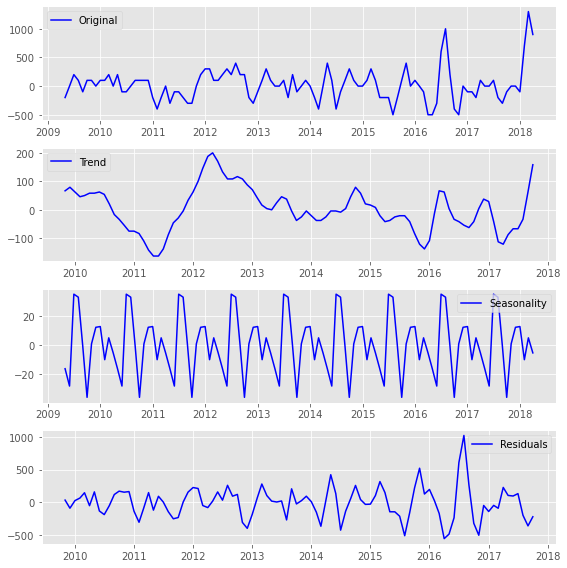

In [176]:
seasonal_decomposition(detrended_series)

#### Autocorrelation and Partial Correlation

White noise model has a fixed and constant mean and variance with no correlation over time.

A random walk model has no specified mean or variance and has a strong dependence over time.

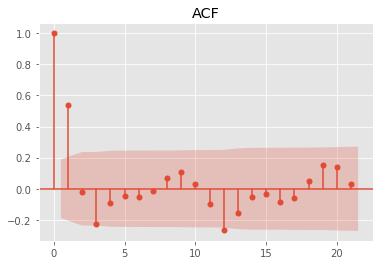

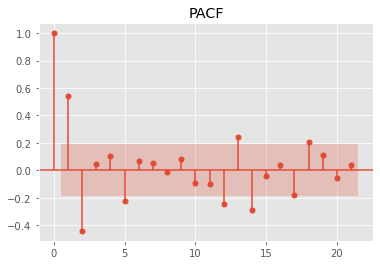

In [177]:
# plotting autocorrelation and partial correlation
acf_plot = plot_acf(detrended_series.dropna(), title="ACF")
pacf_plot = plot_pacf(detrended_series.dropna(), title="PACF")

There is correlation with ACF and PACF indicating this is not White Noise.  There does seem to be some seasonality so we will model with SARIMAX.

### SARIMAX Model

In [257]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [258]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(cvz,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}: AIC Calculated={}'.format(comb, combs, output.aic))
        except:
            continue

C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 0, 0) x (0, 0, 0, 12): AIC Calculated=3105.262686208715
ARIMA (0, 0, 0) x (0, 0, 1, 12): AIC Calculated=126752.69320308416
ARIMA (0, 0, 0) x (0, 1, 0, 12): AIC Calculated=1723.238037865409
ARIMA (0, 0, 0) x (0, 1, 1, 12): AIC Calculated=1532.7350774329743
ARIMA (0, 0, 0) x (1, 0, 0, 12): AIC Calculated=1733.7962633616062
ARIMA (0, 0, 0) x (1, 0, 1, 12): AIC Calculated=1715.903692618593
ARIMA (0, 0, 0) x (1, 1, 0, 12): AIC Calculated=1549.8104483126335


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 0, 0) x (1, 1, 1, 12): AIC Calculated=1545.6930685065086
ARIMA (0, 0, 1) x (0, 0, 0, 12): AIC Calculated=2995.5257599578363
ARIMA (0, 0, 1) x (0, 0, 1, 12): AIC Calculated=115585.57546845943


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 0, 1) x (0, 1, 0, 12): AIC Calculated=1650.9786283550154
ARIMA (0, 0, 1) x (0, 1, 1, 12): AIC Calculated=1410.857308379302

C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



ARIMA (0, 0, 1) x (1, 0, 0, 12): AIC Calculated=2715.7143562853967
ARIMA (0, 0, 1) x (1, 0, 1, 12): AIC Calculated=2667.994399061976


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 0, 1) x (1, 1, 0, 12): AIC Calculated=1441.1683635689062


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 1, 1, 12): AIC Calculated=1412.8572895128857
ARIMA (0, 1, 0) x (0, 0, 0, 12): AIC Calculated=1612.819045304561
ARIMA (0, 1, 0) x (0, 0, 1, 12): AIC Calculated=1450.9783072373227
ARIMA (0, 1, 0) x (0, 1, 0, 12): AIC Calculated=1516.6182832347638


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 1, 0) x (0, 1, 1, 12): AIC Calculated=1340.4789761177378
ARIMA (0, 1, 0) x (1, 0, 0, 12): AIC Calculated=1472.8089209023021
ARIMA (0, 1, 0) x (1, 0, 1, 12): AIC Calculated=1451.5545790455699
ARIMA (0, 1, 0) x (1, 1, 0, 12): AIC Calculated=1360.7812787951066


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 1, 0) x (1, 1, 1, 12): AIC Calculated=1349.4031362705755
ARIMA (0, 1, 1) x (0, 0, 0, 12): AIC Calculated=1545.8415382681987
ARIMA (0, 1, 1) x (0, 0, 1, 12): AIC Calculated=1396.9178437530165
ARIMA (0, 1, 1) x (0, 1, 0, 12): AIC Calculated=1468.1803131307702


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 1, 1) x (0, 1, 1, 12): AIC Calculated=1279.464675671312
ARIMA (0, 1, 1) x (1, 0, 0, 12): AIC Calculated=1423.5343652759502
ARIMA (0, 1, 1) x (1, 0, 1, 12): AIC Calculated=1398.4738439732273


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-package

ARIMA (0, 1, 1) x (1, 1, 0, 12): AIC Calculated=1330.2919320799151
ARIMA (0, 1, 1) x (1, 1, 1, 12): AIC Calculated=1305.5567801169595
ARIMA (1, 0, 0) x (0, 0, 0, 12): AIC Calculated=1627.5785050932718


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 0, 0) x (0, 0, 1, 12): AIC Calculated=1466.0250252903518
ARIMA (1, 0, 0) x (0, 1, 0, 12): AIC Calculated=1529.8622732611523
ARIMA (1, 0, 0) x (0, 1, 1, 12): AIC Calculated=1361.2883560645746


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 0, 0) x (1, 0, 0, 12): AIC Calculated=1475.024440910252
ARIMA (1, 0, 0) x (1, 0, 1, 12): AIC Calculated=1468.4712831831803


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (1, 1, 0, 12): AIC Calculated=1360.9972489581
ARIMA (1, 0, 0) x (1, 1, 1, 12): AIC Calculated=1362.801417844464
ARIMA (1, 0, 1) x (0, 0, 0, 12): AIC Calculated=1561.241173592732


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 0, 1) x (0, 0, 1, 12): AIC Calculated=1520.4729837913815
ARIMA (1, 0, 1) x (0, 1, 0, 12): AIC Calculated=1504.2869456893072


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 1, 1, 12): AIC Calculated=1300.127522101262
ARIMA (1, 0, 1) x (1, 0, 0, 12): AIC Calculated=1521.3451747710005


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 0, 1, 12): AIC Calculated=1471.845512279236
ARIMA (1, 0, 1) x (1, 1, 0, 12): AIC Calculated=1326.9822397085281


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 1, 1, 12): AIC Calculated=1300.760526897981
ARIMA (1, 1, 0) x (0, 0, 0, 12): AIC Calculated=1566.6000416830466
ARIMA (1, 1, 0) x (0, 0, 1, 12): AIC Calculated=1417.1340928266004
ARIMA (1, 1, 0) x (0, 1, 0, 12): AIC Calculated=1477.4635757262383


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 1, 0) x (0, 1, 1, 12): AIC Calculated=1308.8049911643466
ARIMA (1, 1, 0) x (1, 0, 0, 12): AIC Calculated=1419.4304462117154
ARIMA (1, 1, 0) x (1, 0, 1, 12): AIC Calculated=1418.5181674866944


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 1, 0) x (1, 1, 0, 12): AIC Calculated=1309.7230232541929


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 1, 1, 12): AIC Calculated=1309.7758674504091
ARIMA (1, 1, 1) x (0, 0, 0, 12): AIC Calculated=1540.026394414405
ARIMA (1, 1, 1) x (0, 0, 1, 12): AIC Calculated=1392.107223534915


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-package

ARIMA (1, 1, 1) x (0, 1, 0, 12): AIC Calculated=1457.7754434643518
ARIMA (1, 1, 1) x (0, 1, 1, 12): AIC Calculated=1269.357543791922


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 0, 0, 12): AIC Calculated=1405.3922142677256
ARIMA (1, 1, 1) x (1, 0, 1, 12): AIC Calculated=1394.099014320609


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 1, 0, 12): AIC Calculated=1310.884782885021


C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 1, 1, 12): AIC Calculated=1264.2722416186634


In [259]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic           1264.27
Name: 63, dtype: object

In [252]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(detrended_series, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(1, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary())

C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jakes\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                         Mean Price   No. Observations:                  108
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -574.524
Date:                            Thu, 29 Dec 2022   AIC                           1159.048
Time:                                    12:30:32   BIC                           1171.020
Sample:                                05-01-2009   HQIC                          1163.851
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2009      0.340     -0.590      0.555      -0.868       0.466
ma.L1          0.4553      0.308   

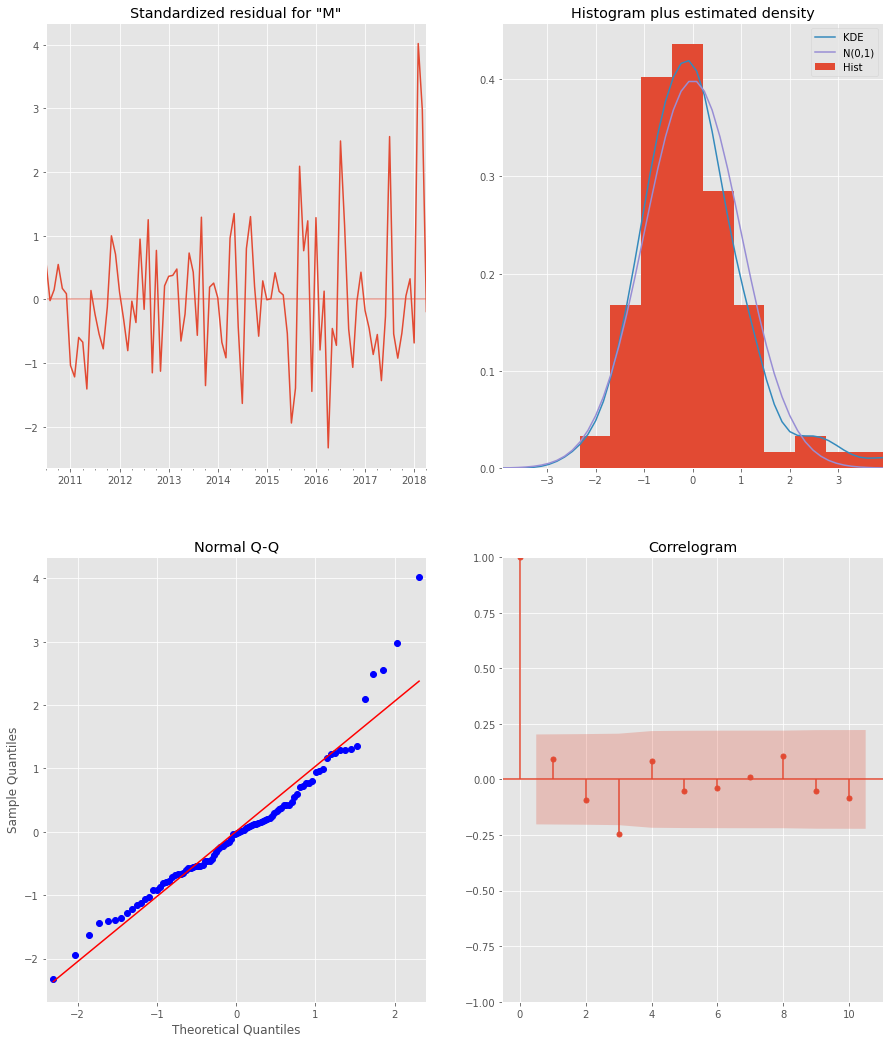

In [260]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

The residuals appear uncorrelated and normally distributed having 0 mean.

### Forecasting

#### Non-dynamic

In [261]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_conf = pred.conf_int()

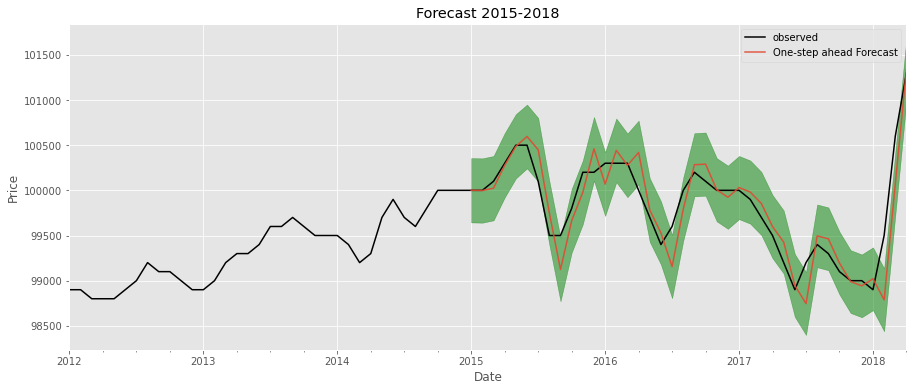

In [262]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = cvz['2012':].plot(label='observed', color= 'black')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Forecast 2015-2018')
plt.legend()

plt.show()

Forecasts align with true values as seen above with overall increase in trend.  Now we will check for accuracy use RMSE (root mean squared error).

In [270]:
# Get the real and predicted values
cvz_forecasted = pred.predicted_mean
cvz_truth = cvz['2015-01':]

# Compute the mean square error
mse = ((cvz_forecasted - cvz_truth) ** 2).mean()**.5
print('The Root Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Root Mean Squared Error of our forecasts is 233.94


#### Dynamic forecasting

The model continuously predicts one-step ahead (t+1) and then for the 2nd step ahead (t+2) prediction, it appends predicted value (t+1) to data, re-fits model on new expanded data then makes 2nd step ahead forecast.

In [264]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

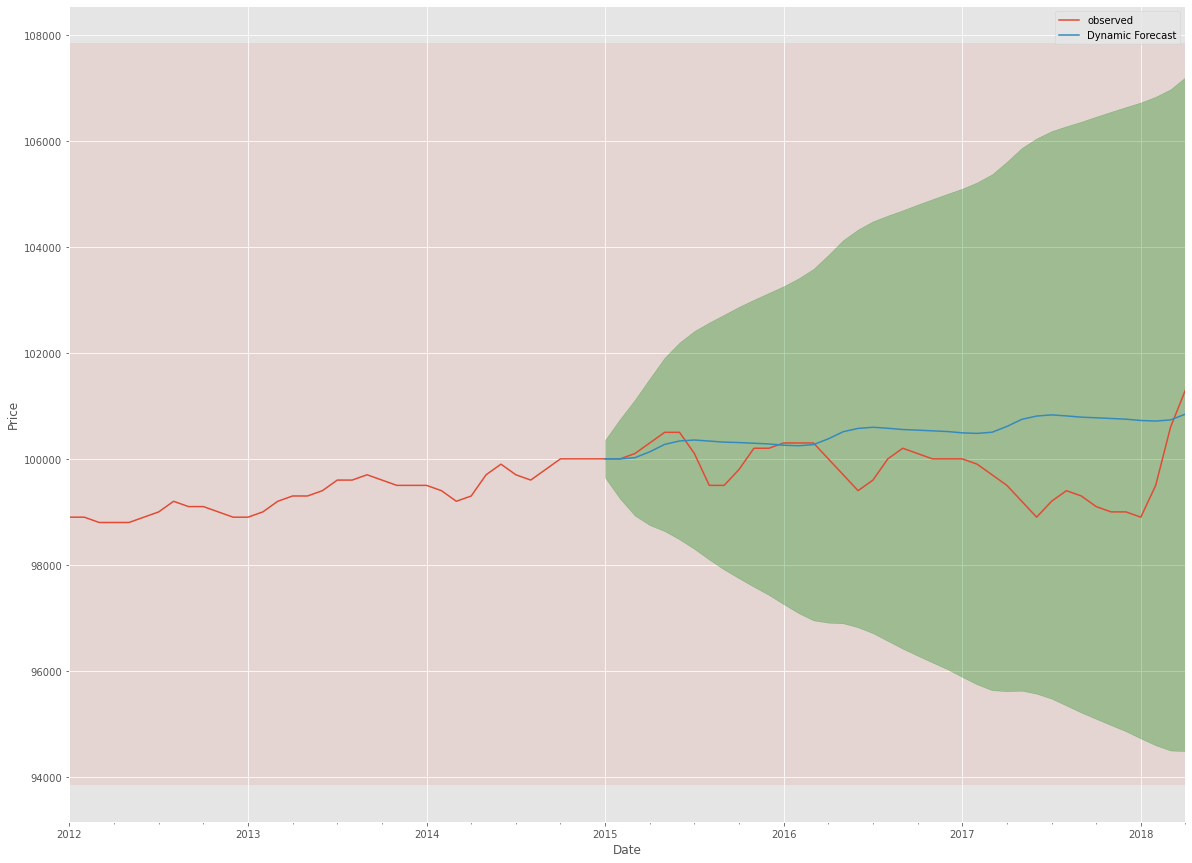

In [265]:
# Plot the dynamic forecast with confidence intervals.

ax = cvz['2012':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), tz_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [333]:
# Extract the predicted and true values of our time series
cvz_forecasted1 = pred_dynamic.predicted_mean
cvz_truth1 = cvz['2015-01-01':]

# Compute the mean square error
mse = ((cvz_forecasted1 - cvz_truth1) ** 2).mean()**.5
print('The Root Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Root Mean Squared Error of our forecasts is 942.32


#### Future Prediction

The .get_forecast() method of our time series output can compute forecasted values for a specified number of steps ahead.

In [198]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=36)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

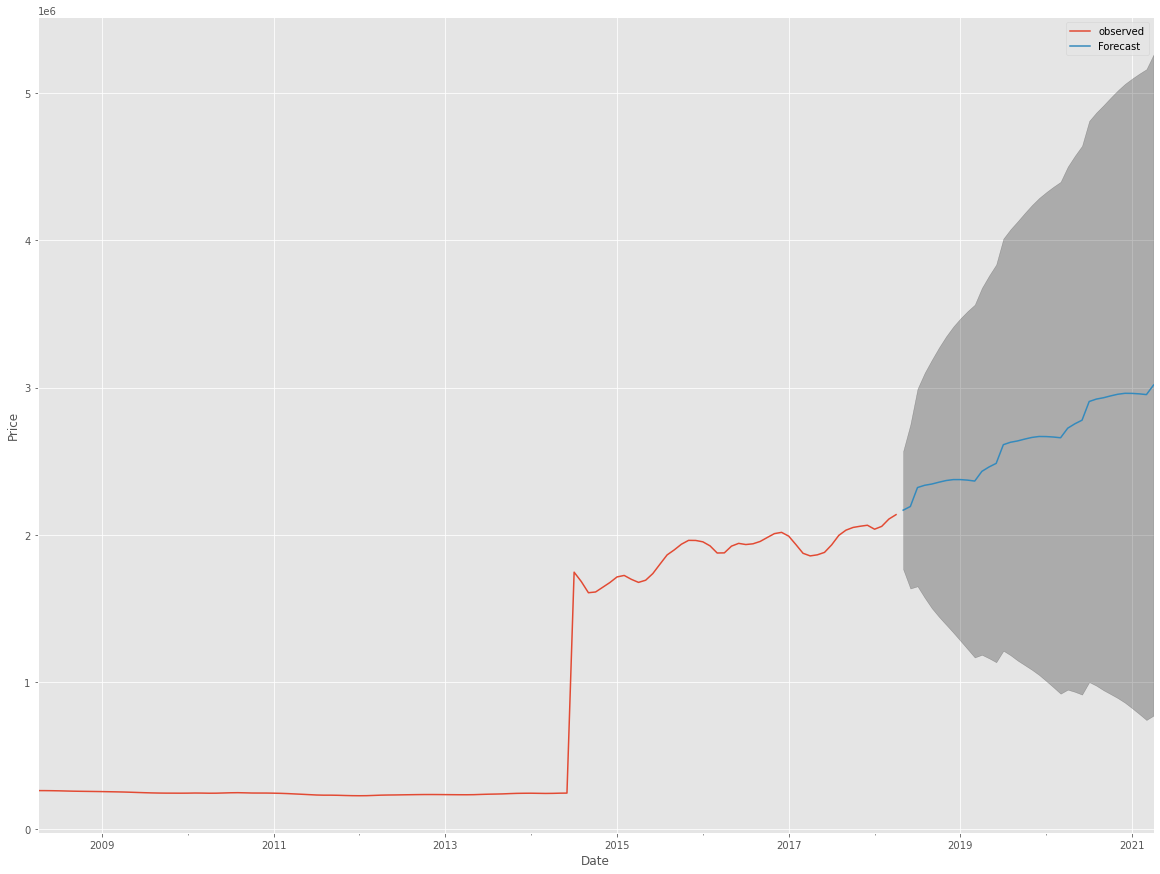

In [199]:
# Plot future predictions with confidence intervals
ax = tz.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

Our model shows a steady rise in price in the next three years.

### Findings

10 of the top 50 zipcodes with the highest 10 year ROI were in Santa Clara County.  The average ROI over 10 years was 88% in Santa Clara county as compared to 13% on average over the same period nationwide.

4 of the top 5 counties with the most top 50 '3 year ROI' zipcodes are in Florida.  The average 3 year ROI in Florida is 36% as compared to the 21% national average.

The best investment for a longer time horizon is Santa Clara County in California.  For investors more interested in short term flips, the state of Florida and specifically Brevard, Volusia, Polk, and Duval counties.

Given the relative safety of real estate home investing as compared to other investment instruments, CV should be viewed secondarily to predicted ROI.  Our Forecast model predict a healthy ROI in the next three years.

5 zipcodes with the highest 10 year ROI: 

1. 02116 in Boston, MA
2. 03215 in Waterville Valley, New Hampshire
3. 94574 in St. Helena, CA
4. 96752 in Kauai County, Hawaii
5. 96722 in Kaui County, Hawaii

5 zipcodes with highest 3 year ROI:
1. 2790 in northeastern North Carolina
2. 30032 in Dekalb County, Georgia
3. 19134 in Philadelphia, PA
4. 28208 in Charlotte, North Carolina
5. 33705 in St. Petersberg, Florida

5 zipcodes with lowest 10 year CV:
1. 64836 in Jasper County, Missouri
2. 16508 in Erie, PA
3. 64801 in Jasper County, Missouri
4. 64870 in Jasper Country, Missouri
5. 79934 in El Paso, Texas

# Step 2: Data Preprocessing

In [ ]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [ ]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results